# Google Trend Data

# Basic Forecasting Techniques

In [1]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [2]:
data = pd.read_csv('C:/Customers_in_a_Shop.csv',header=None)
data

,0,1
0,1949-01,114.0
1,1949-02,120.0
2,1949-03,134.0
3,1949-04,67.0
4,1949-05,123.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,720.0
142,1960-11,750.0


In [3]:
data.columns = ['Date','Customers']
data['Date'] = pd.to_datetime(data['Date'],format="%Y-%m")
data = data.set_index('Date')

#Shape of the dataset
data.shape

(144, 1)

In [4]:
data.head()

,Customers
Date,
1949-01-01,114.0
1949-02-01,120.0
1949-03-01,134.0
1949-04-01,67.0
1949-05-01,123.0


# Missing Data Handling in Time Series
### We have the following methods for treating missing values in the time series data.
1)	Mean Imputation

2)	Last Observation Carried forward

3)	Linear Interpolation

4)	Seasonal Interpolation


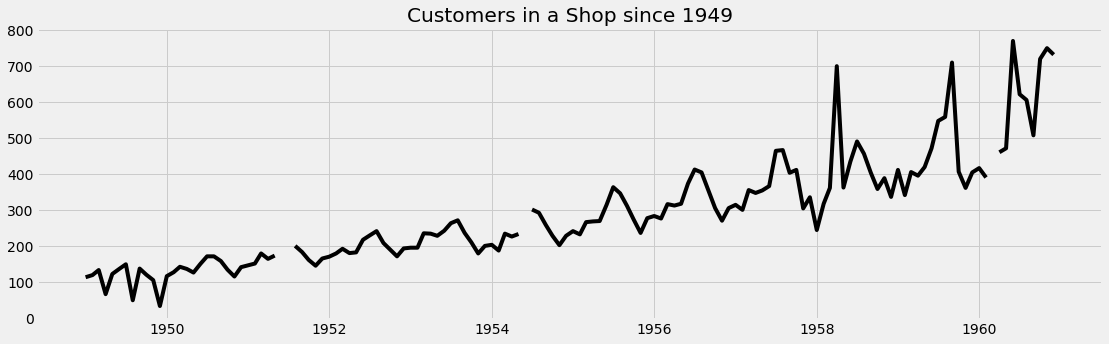

In [5]:
plt.rcParams['figure.figsize']=(17,5)

plt.plot(data,color='black')
plt.title("Customers in a Shop since 1949")
plt.show()

## Mean Imputation

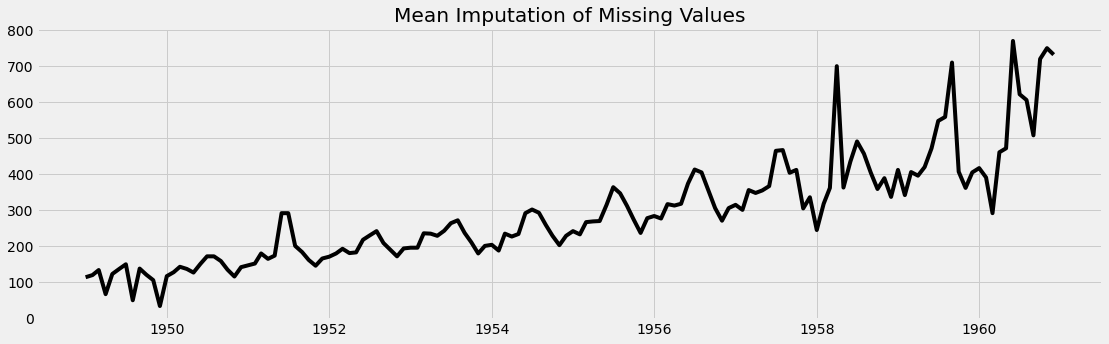

In [6]:
plt.rcParams['figure.figsize']=(17,5)
data['Customers_mean'] = data['Customers'].fillna(data['Customers'].mean())
plt.plot(data['Customers_mean'],color='black')
plt.title("Mean Imputation of Missing Values")
plt.show()

## Backward Fill Imputation

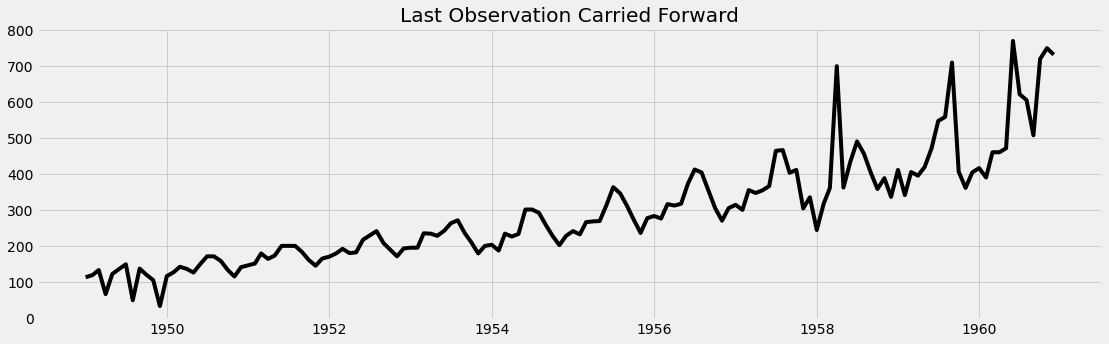

In [7]:
plt.rcParams['figure.figsize']=(17,5)

data['Customers_bfill'] = data['Customers'].bfill()

plt.plot(data['Customers_bfill'],color='black')
plt.title("Last Observation Carried Forward")
plt.show()

## Linear Interpolation

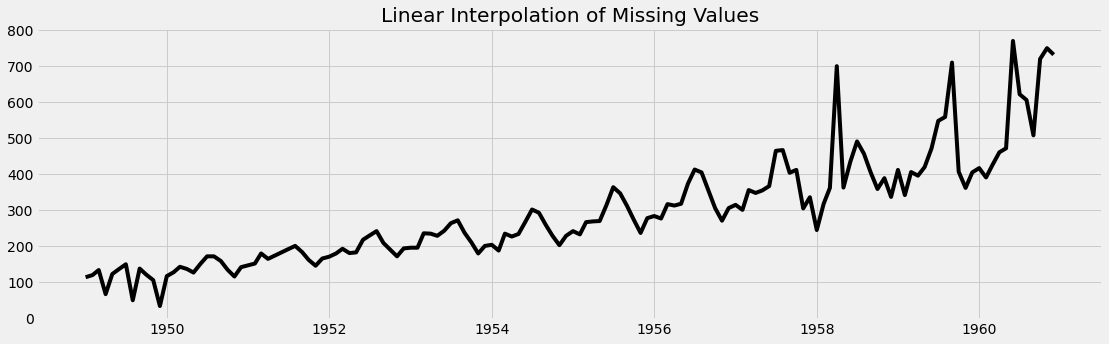

In [8]:
plt.rcParams['figure.figsize']=(17,5)

data['Customers_linear']=data['Customers'].interpolate(method='linear')

plt.plot(data['Customers_linear'],color='black')
plt.title("Linear Interpolation of Missing Values")
plt.show()

## Seasonal Interpolation

In [9]:
# lets find the dates where we have missing values
data.index[data['Customers'].isnull()]

DatetimeIndex(['1951-06-01', '1951-07-01', '1954-06-01', '1960-03-01'], dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
data.tail(15)

,Customers,Customers_mean,Customers_bfill,Customers_linear
Date,,,,
1959-10-01,407.0,407.000000,407.0,407.0
1959-11-01,362.0,362.000000,362.0,362.0
1959-12-01,405.0,405.000000,405.0,405.0
1960-01-01,417.0,417.000000,417.0,417.0
1960-02-01,391.0,391.000000,391.0,391.0
1960-03-01,NaN,291.878571,461.0,426.0
1960-04-01,461.0,461.000000,461.0,461.0
1960-05-01,472.0,472.000000,472.0,472.0
1960-06-01,770.0,770.000000,770.0,770.0


In [11]:
#for example for 1960 take average seasonal of previous date
data['1949-03':'1959-03':12]

,Customers,Customers_mean,Customers_bfill,Customers_linear
Date,,,,
1949-03-01,134.0,134.0,134.0,134.0
1950-03-01,143.0,143.0,143.0,143.0
1951-03-01,180.0,180.0,180.0,180.0
1952-03-01,193.0,193.0,193.0,193.0
1953-03-01,236.0,236.0,236.0,236.0
1954-03-01,235.0,235.0,235.0,235.0
1955-03-01,267.0,267.0,267.0,267.0
1956-03-01,317.0,317.0,317.0,317.0
1957-03-01,356.0,356.0,356.0,356.0


In [12]:
data['1949-03':'1959-03':12].sum()

Customers           2829.0
Customers_mean      2829.0
Customers_bfill     2829.0
Customers_linear    2829.0
dtype: float64

In [13]:
data['1949-03':'1959-03':12].shape[0]

11

In [14]:
data['1949-03':'1959-03':12].shape[1]

4

In [15]:
data.loc['1960-03'].fillna((data['1949-03':'1959-03':12].sum())/data['1949-03':'1959-03':12].shape[0], inplace=True)
data.loc['1954-06'].fillna((data['1949-06':'1953-06':12].sum())/data['1949-06':'1953-06':12].shape[0], inplace=True)
data.loc['1951-07'].fillna((data['1949-07':'1950-07':12].sum())/data.loc['1949-07':'1950-07':12].shape[0], inplace=True)
data.loc['1951-06'].fillna((data['1949-06':'1950-06':12].sum())/data['1949-06':'1950-06':12].shape[0], inplace=True)

In [16]:
data.isnull().sum()

0

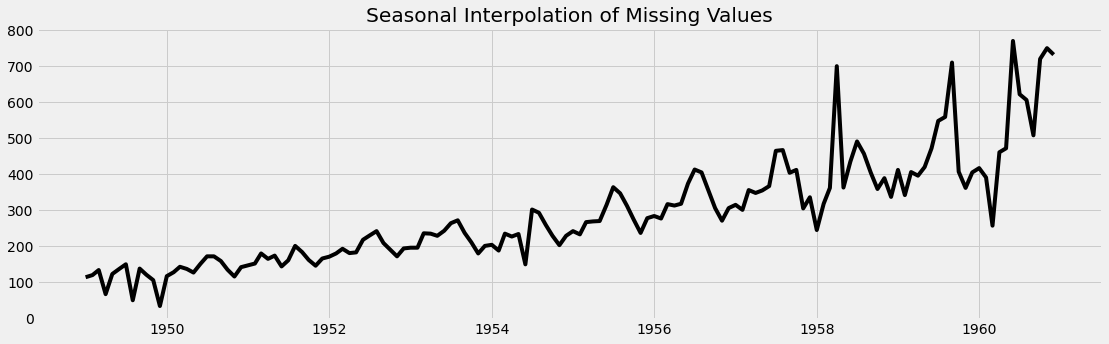

In [17]:
plt.rcParams['figure.figsize']=(17,5)
plt.plot(data['Customers'],color='black')
plt.title("Seasonal Interpolation of Missing Values")
plt.show()

## Outliers Treatment in Time Series

<AxesSubplot:xlabel='Customers_linear'>

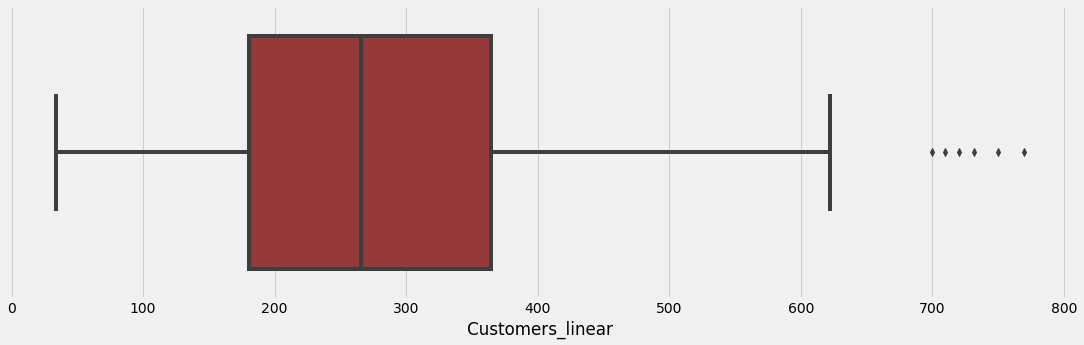

In [18]:
plt.rcParams['figure.figsize']=(17,5)
sns.boxplot(data['Customers_linear'], color='brown')

In [19]:
data['Customers_linear'].sort_values(ascending = False).head(7)

Date
1960-06-01    770.0
1960-11-01    750.0
1960-12-01    732.0
1960-10-01    720.0
1959-09-01    710.0
1958-04-01    700.0
1960-07-01    622.0
Name: Customers_linear, dtype: float64

In [20]:
# outliers treatment

data['Customers_linear'].loc[(data['Customers_linear']>=700)] = 622
# lets also check the null values again
data.isnull().sum()

Customers           0
Customers_mean      0
Customers_bfill     0
Customers_linear    0
dtype: int64

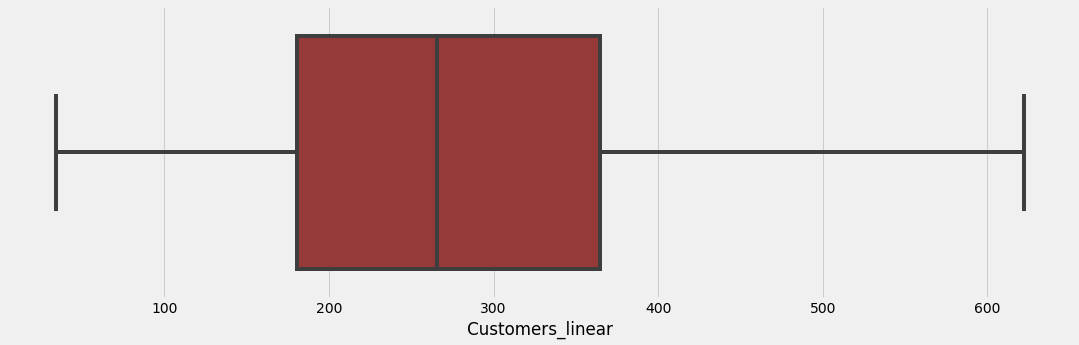

In [21]:
plt.rcParams['figure.figsize']=(17,5)
sns.boxplot(data['Customers_linear'], color='brown')
plt.show()

# Normality Analysis

<AxesSubplot:xlabel='Customers_linear', ylabel='Density'>

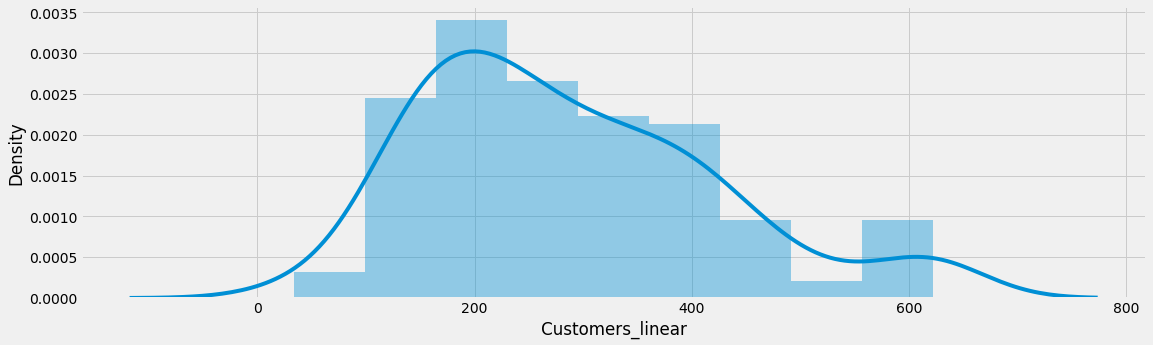

In [22]:
import seaborn as sns
sns.distplot(data['Customers_linear'])

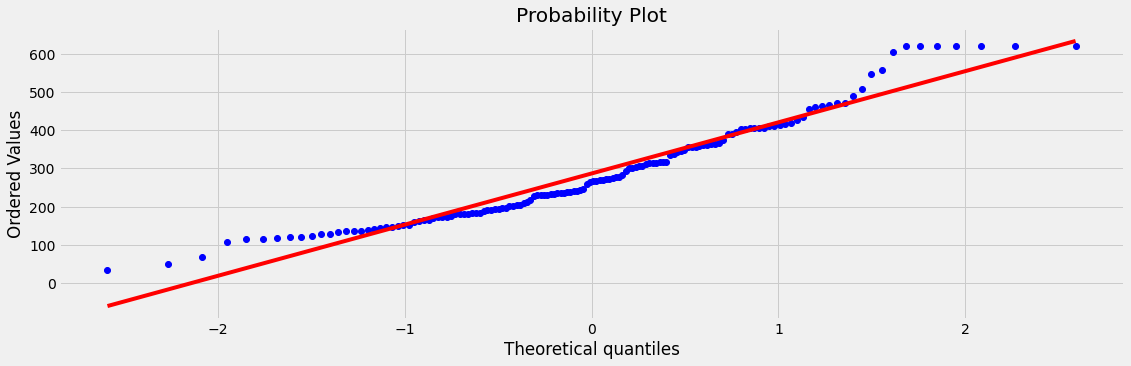

In [23]:
import scipy.stats
import pylab 
scipy.stats.probplot(data['Customers_linear'],plot=pylab)
# pylab.show()

# Y-Axis: Data Value
# X-Axis: 

* for correct statistic Analysis you can use Zscore function from statsmodels 

# Naive Decomposition
### Additive Seasonal Decomposition

In [24]:
import statsmodels.api as sm

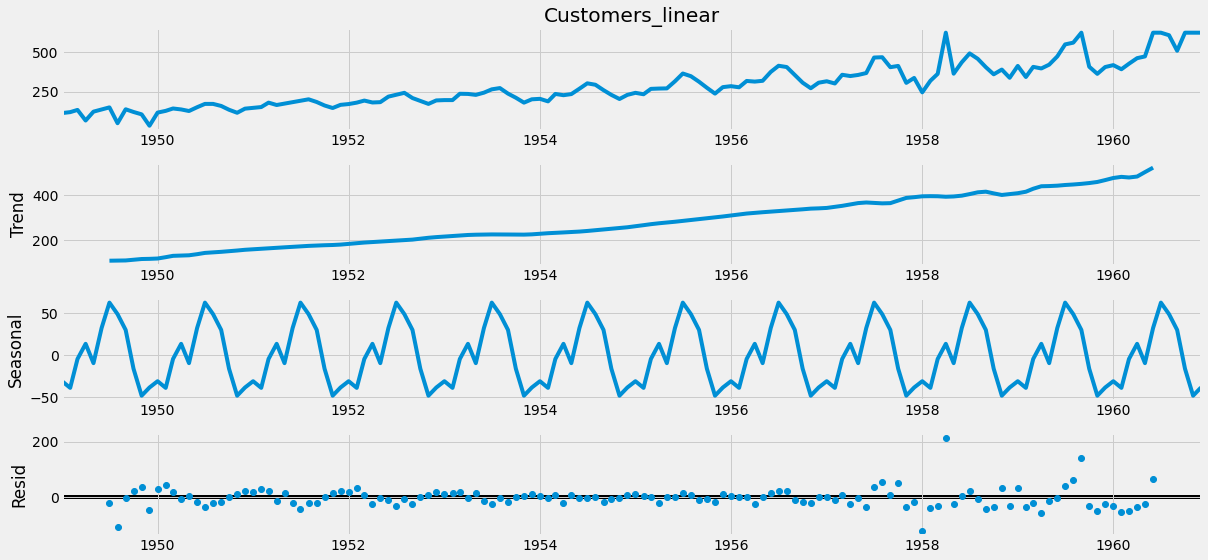

In [25]:
plt.rcParams['figure.figsize'] = (17,8)

decomposition = sm.tsa.seasonal_decompose(data['Customers_linear'], model='additive')
decomposition.plot()
                                          
plt.show()

* Be attention at Y-Scale in Seasonal! (-50,+50) from orginal data

### Multiplicative Seasonal Decomposition

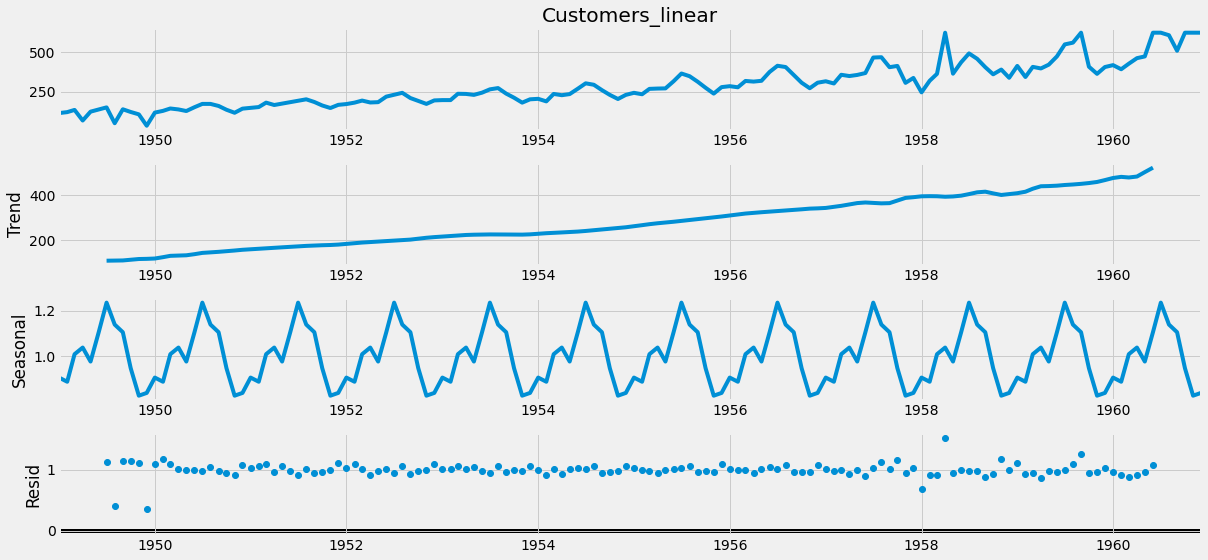

In [26]:
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (17,8)

decomposition = sm.tsa.seasonal_decompose(data['Customers_linear'], model='multiplicative')
fig = decomposition.plot()
plt.show()

## Splitting Train and Test data

In [27]:
len(data["Customers_linear"])*0.8

115.2

* We Split the data into train and test.
* First 115 rows as the train data and rest other as test data

In [28]:
data['Customers'] = data['Customers_linear']

In [29]:
length_train = 115
train = data.iloc[:length_train,:]
train

,Customers,Customers_mean,Customers_bfill,Customers_linear
Date,,,,
1949-01-01,114.0,114.0,114.0,114.0
1949-02-01,120.0,120.0,120.0,120.0
1949-03-01,134.0,134.0,134.0,134.0
1949-04-01,67.0,67.0,67.0,67.0
1949-05-01,123.0,123.0,123.0,123.0
...,...,...,...,...
1958-03-01,362.0,362.0,362.0,362.0
1958-04-01,622.0,700.0,700.0,622.0
1958-05-01,363.0,363.0,363.0,363.0


In [30]:
test=data.iloc[length_train:,: ]
test

,Customers,Customers_mean,Customers_bfill,Customers_linear
Date,,,,
1958-08-01,457.0,457.000000,457.0,457.0
1958-09-01,404.0,404.000000,404.0,404.0
1958-10-01,359.0,359.000000,359.0,359.0
1958-11-01,389.0,389.000000,389.0,389.0
1958-12-01,337.0,337.000000,337.0,337.0
1959-01-01,412.0,412.000000,412.0,412.0
1959-02-01,342.0,342.000000,342.0,342.0
1959-03-01,406.0,406.000000,406.0,406.0
1959-04-01,396.0,396.000000,396.0,396.0


In [31]:
print(train.shape)
train.tail()

(115, 4)


,Customers,Customers_mean,Customers_bfill,Customers_linear
Date,,,,
1958-03-01,362.0,362.0,362.0,362.0
1958-04-01,622.0,700.0,700.0,622.0
1958-05-01,363.0,363.0,363.0,363.0
1958-06-01,435.0,435.0,435.0,435.0
1958-07-01,491.0,491.0,491.0,491.0


In [32]:
print(train.shape)
test.head()

(115, 4)


,Customers,Customers_mean,Customers_bfill,Customers_linear
Date,,,,
1958-08-01,457.0,457.0,457.0,457.0
1958-09-01,404.0,404.0,404.0,404.0
1958-10-01,359.0,359.0,359.0,359.0
1958-11-01,389.0,389.0,389.0,389.0
1958-12-01,337.0,337.0,337.0,337.0


# Naive Method
The naive method is the simplest method of all forecasting methods. It looks at the last historical data and extrapolates it for all the future values without adjusting or attempting to establish causal factors.

In [33]:
train.[Customers][114]

491.0

In [34]:
y_naive = test.copy()
y_naive['forecasted_naive'] = train.Customers[length_train-1]
y_naive

,Customers,Customers_mean,Customers_bfill,Customers_linear,forecasted_naive
Date,,,,,
1958-08-01,457.0,457.000000,457.0,457.0,491.0
1958-09-01,404.0,404.000000,404.0,404.0,491.0
1958-10-01,359.0,359.000000,359.0,359.0,491.0
1958-11-01,389.0,389.000000,389.0,389.0,491.0
1958-12-01,337.0,337.000000,337.0,337.0,491.0
1959-01-01,412.0,412.000000,412.0,412.0,491.0
1959-02-01,342.0,342.000000,342.0,342.0,491.0
1959-03-01,406.0,406.000000,406.0,406.0,491.0
1959-04-01,396.0,396.000000,396.0,396.0,491.0


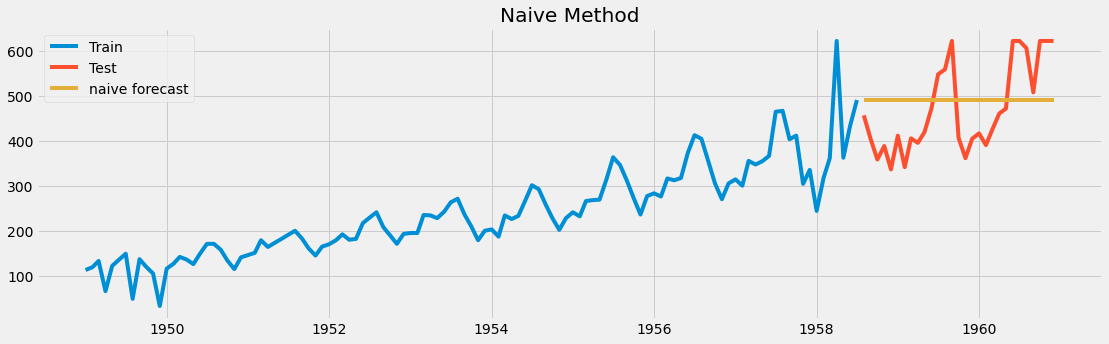

In [35]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_naive['forecasted_naive'], label = 'naive forecast')

plt.legend()
plt.title('Naive Method')
plt.show()

# Simple Average Method
In this method, we take the future predictions equal to the average of all the historical data.

In [36]:
y_avg = test.copy()

y_avg['forecasted_avg'] = train['Customers'].mean()

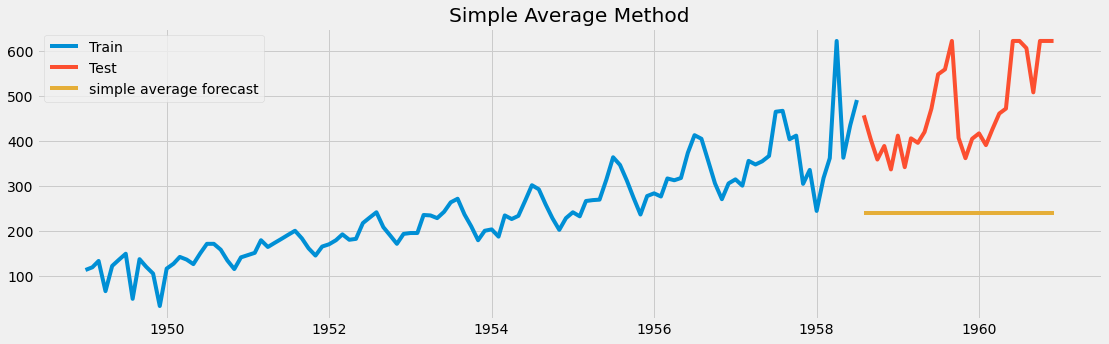

In [37]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_avg['forecasted_avg'], label = 'simple average forecast')

plt.legend()
plt.title('Simple Average Method')
plt.show()

# Simple Moving Average Method
In this method, we take the future predictions equal to the average of a moving window. A window can be a time period of 3 months, 6 months, 9 months or 1 year.

In [38]:
y_moving = data.copy()

window = 9
y_moving["moving_average_forecast"] = data['Customers'].rolling(window).mean()
# y_moving['moving_average_forecast'][length_train:] = y_moving['moving_average_forecast'][length_train-1]

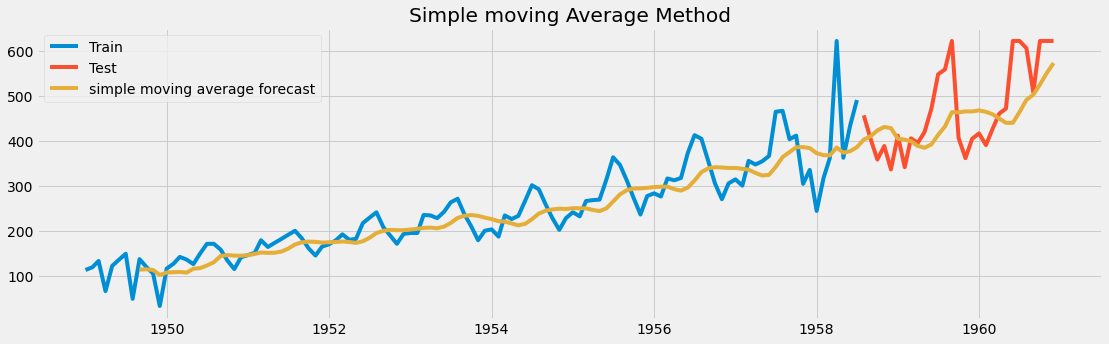

In [39]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_moving['moving_average_forecast'], label = 'simple moving average forecast')

plt.legend()
plt.title('Simple moving Average Method')
plt.show()

* are you serious about using it for time series modeling?

# Simple Exponential Smoothing


C:\Users\amirr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<AxesSubplot:xlabel='Date'>

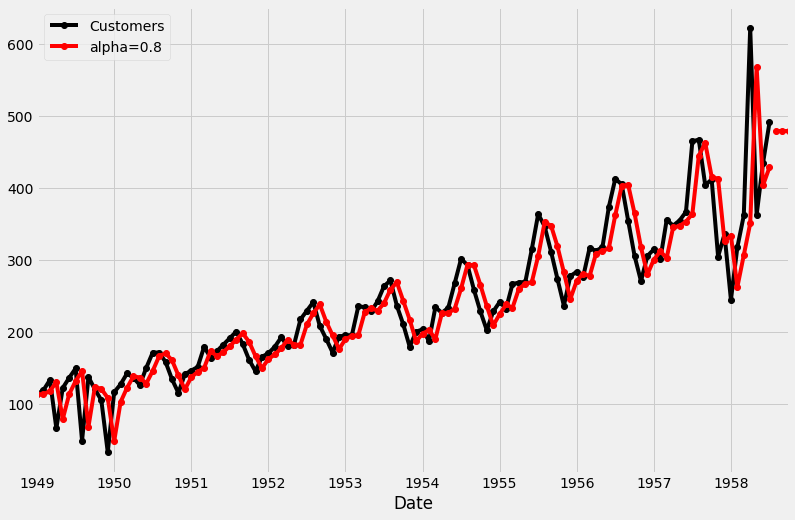

In [40]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

ins2 = SimpleExpSmoothing(train['Customers']).fit(smoothing_level=0.8,optimized=False)
ins_cast2 = ins2.forecast(3).rename('alpha=0.8')


#Plot for alpha = 0.8
ax = train['Customers'].plot(marker='o', color='black', figsize=(12,8), legend=True)
ins_cast2.plot(marker='o', ax=ax, color='red', legend=True)
ins2.fittedvalues.plot(marker='o', ax=ax, color='red')

C:\Users\amirr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\amirr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\amirr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<AxesSubplot:xlabel='Date'>

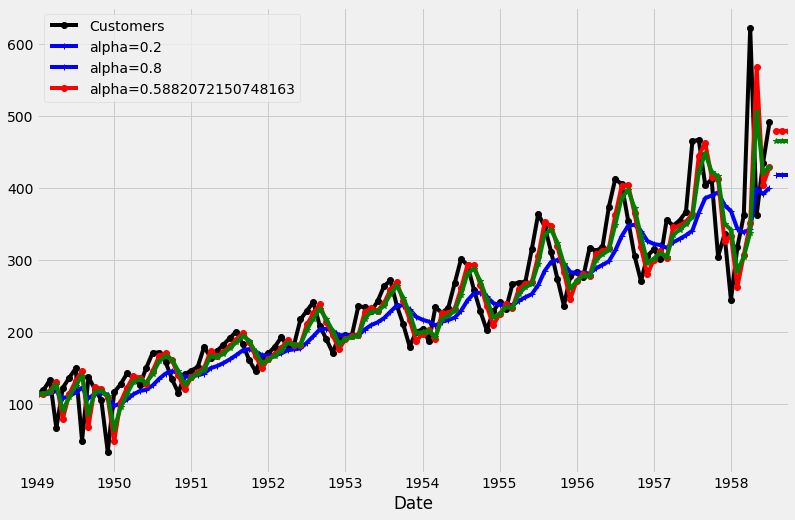

In [41]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

#First Instance
ins1 = SimpleExpSmoothing(train['Customers']).fit(smoothing_level=0.2,optimized=False)
ins_cast1 = ins1.forecast(3).rename('alpha=0.2')

#Second Instance
ins2 = SimpleExpSmoothing(train['Customers']).fit(smoothing_level=0.8,optimized=False)
ins_cast2 = ins2.forecast(3).rename('alpha=0.8')

#Third Instance
ins3 = SimpleExpSmoothing(train['Customers']).fit()
ins_cast3 = ins3.forecast(3).rename('alpha=%s'%ins3.model.params['smoothing_level'])


#After creating model we will visualize the plot
ax = train['Customers'].plot(marker='o', color='black', figsize=(12,8), legend=True)


#Plot for alpha =0.2
ins_cast1.plot(marker='+', ax=ax, color='blue', legend=[True])
ins1.fittedvalues.plot(marker='+', ax=ax, color='blue')

#Plot for alpha = 0.8
ins_cast2.plot(marker='o', ax=ax, color='red', legend=True)
ins2.fittedvalues.plot(marker='o', ax=ax, color='red')

#Plot for alpha=Optimized by statsmodel
ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
ins3.fittedvalues.plot(marker='*', ax=ax, color='green')

In [42]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(train['Customers'])
model_fit = model.fit(smoothing_level=1)
# model_fit.params

C:\Users\amirr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [43]:
y_exp = test.copy()
y_exp['Exponential_forecast'] = model_fit.forecast(24)
y_exp

,Customers,Customers_mean,Customers_bfill,Customers_linear,Exponential_forecast
Date,,,,,
1958-08-01,457.0,457.000000,457.0,457.0,491.0
1958-09-01,404.0,404.000000,404.0,404.0,491.0
1958-10-01,359.0,359.000000,359.0,359.0,491.0
1958-11-01,389.0,389.000000,389.0,389.0,491.0
1958-12-01,337.0,337.000000,337.0,337.0,491.0
1959-01-01,412.0,412.000000,412.0,412.0,491.0
1959-02-01,342.0,342.000000,342.0,342.0,491.0
1959-03-01,406.0,406.000000,406.0,406.0,491.0
1959-04-01,396.0,396.000000,396.0,396.0,491.0


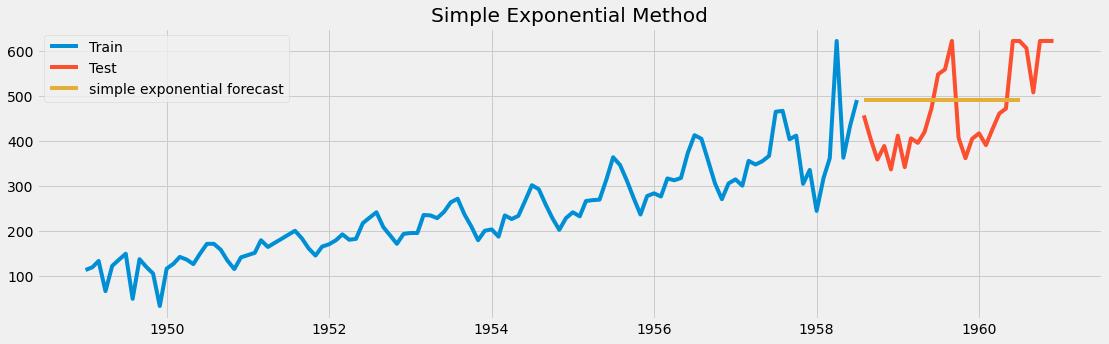

In [44]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_exp['Exponential_forecast'], label = 'simple exponential forecast')

plt.legend()
plt.title('Simple Exponential Method')
plt.show()

* Last day for alpha = 1

# Holt Exponential Smoothing
Holt’s exponential smoothing captures the level and trend of time series in the forecast.

The forecast equation is a function of both level and trend.

y(t+1) = l(t) +b(t) 

Where l(t) is the level component and b(t) is the trend component.

The trend component is calculated as shown

b(t) = β(l(t) - l(t-1)) + (1-β)b(t-1) 

Here beta is the smoothing parameter for trend.


In [45]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train['Customers'], seasonal_periods=12, trend='multiplicative')
model_fit = model.fit(smoothing_level=0.2,smoothing_slope=0.04)
model_fit.params
y_holtexponential = test.copy()
y_holtexponential['holtexponential_forecast'] = model_fit.forecast(24)

C:\Users\amirr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


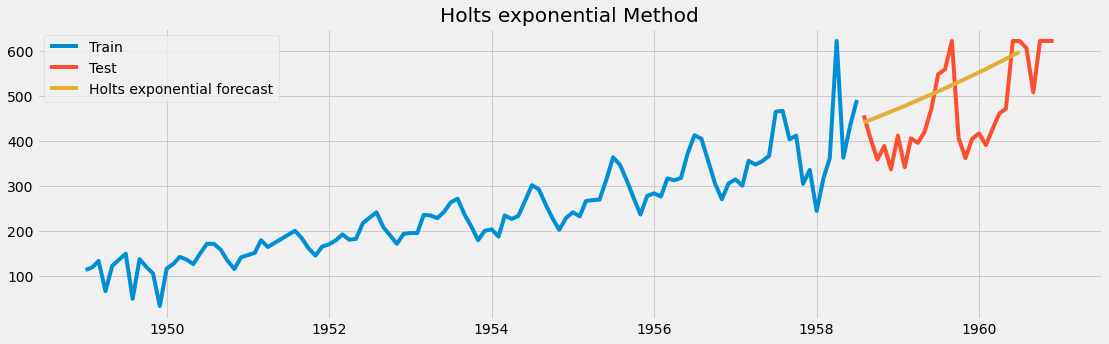

In [46]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_holtexponential['holtexponential_forecast'], label = 'Holts exponential forecast')

plt.legend()
plt.title('Holts exponential Method')
plt.show()

# Holt Winter Exponential Smoothing
This techniques forecasts based on level, trend and seasonality.
The forecast equation for this method includes seasonality.
	
y(t+1) = l(t)+b(t)+s(t+1-m) 
Here m is the number of time a season repeats in a time period.

In [78]:
model = ExponentialSmoothing(train['Customers'], seasonal_periods=12, trend='multiplicative', seasonal='additive')
model_fit = model.fit(smoothing_level=0.2,smoothing_slope=0.04)
model_fit.params
y_holtwinter = test.copy()
y_holtwinter['holtwinter_forecast'] = model_fit.forecast(12)

C:\Users\amirr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


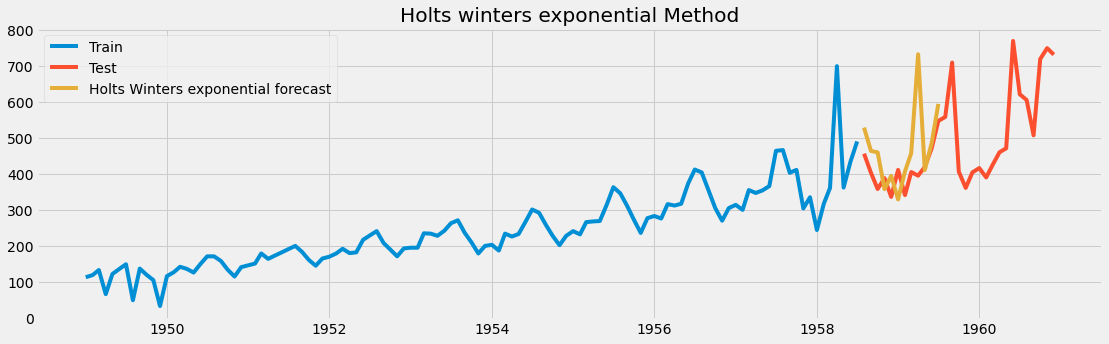

In [27]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_holtwinter['holtwinter_forecast'], label = 'Holts Winters exponential forecast')

plt.legend()
plt.title('Holts winters exponential Method')
plt.show()

# Stationarity
Stationarity means that the statistical properties of a process generating a time series do not change over time. The statistical properties are Mean, variance and covariance which are same irrespective of the time at which you observe them.

In [47]:
pd.DataFrame(data.Customers.describe())

,Customers
count,144.000000
mean,286.680556
std,136.456487
min,34.000000
25%,180.750000
50%,265.500000
75%,364.750000
max,622.000000


# Augmented Dickey-Fuller (ADF) Test for Stationarity
Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given Time series is stationary or not. It is one of the most commonly used statistical test when it comes to analyzing the stationary of a series.
* p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
* p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.